In [233]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import rcParams 
# Parametros de las graficas.
rcParams['figure.figsize'] = (4, 4)
rcParams['figure.dpi'] = 150
rcParams['font.size'] = 10

# Aplicaciones:

### 1. [Regularización: Venta de Casa](#regularizacion)
### 2. [Arbol de Clasificación: Titanic](#titanic)
### 3. [Arbol de Regresión: Millas por Galón](#mpg)
### 4. [Optimización](#opt)

# Implementaciones:
### 1. [Arbol de Decisión](#decision)
### 2. [Arbol de Regresión](#reg)

![title](https://vignette3.wikia.nocookie.net/24wikia/images/3/39/Previouslyon24.jpg/revision/latest?cb=20110322215957&path-prefix=es)

## Vimos los modelos lineales de: 

## Regresión Lineal

![title](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/350px-Linear_regression.svg.png)

### En el cual asumimos que la hipotésis ideal es una linea que se acerca lo más posible a los datos, mientras deja espacio para generalizar.

## Regresión Logistica


![title](https://codesachin.files.wordpress.com/2015/08/linearly_separable_4.png)

### En el cual separamos dos o más clases por medio de una linea.

## Y Validación de modelos

![title](https://qph.ec.quoracdn.net/main-qimg-6f4f40ac0fb1b33d17760d104f6c0864)

### En el cual comparabamos el rendimiento del modelo con datos de entrenamiento y prueba para ver que tan bueno era generalizando. Entre los metodos para reducir la complejidad de un modelo está:

## Regularización

### La regularización es una forma de reducir la complejidad o libertad de un modelo, añadiendo una penalización a los parametros o pesos del mismo. Esta penalización esta basada en los mismos pesos, por lo que los valores de los mismos afectarán su actualización en el futuro. Existen tres tipos de regularización:

### -Lasso o L1
### -Ridge o L2
### -ElasticNet o L1L2

### Lasso (L1)

#### En la regularización Lasso, le sumamos al costo el valor absoluto de los pesos. 

#### $$ J(w)_{Lasso} = J(w) + \frac{\lambda}{m} \sum_{i=1}^{n} |{w_i}|  $$

#### donde $\lambda$ es una constante que representa la fuerza de la regularización. El gradiente del mismo es:

#### $$ \nabla J(w)_{Lasso} = \nabla J(w) + \frac{\lambda}{m} \sum_{i=1}^{n} signo(w_i) $$ 

#### Donde el resultado de la función del signo es -1 para $w$ negativas, 1 para $w$ positivas y 0 para $w = 0$. Lo que hace esta regularización es que los pesos que son positivos tenderán a seguir aumentando, los pesos negativos seguirán disminuyendo mientras que los pesos que ya estan en 0, se quedarán en 0. De esta manera, algunas variables o características se quedarán en 0,  lo cual elimina esas variables, reduciendo la complejidad del modelo. Mientras más grande sea $\lambda$, más coeficientes serán eliminados.

### Ridge (L2)

#### En la regularización Ridge, le sumamos al costo el valor cuadrado de los pesos. 

#### $$ J(w)_{Ridge} = J(w) + \frac{\lambda}{2m}\sum_{i=1}^{n} {w^2}  $$

#### donde $\lambda$ es una constante que representa la fuerza de la regularización. El gradiente del mismo es:

#### $$ \nabla J(w)_{Ridge} = \nabla J(w) + \frac{\lambda}{m} \sum_{i=1}^{n}w_i $$ 

#### En esta regularización, los coeficientes que son muy grandes (ya sea positivamente o negativamente) son disminuidos  hasta estar cerca de 0. Esto hace que los coeficientes grandes sean disminuidos, dandole más importancia a los coeficientes pequeños también, y de esta forma haciendo el modelo más robusto en general.

### ElasticNet (L1L2)

#### En la regularización ElasticNet, combinamos ambas regularizaciones de una forma general. 

#### $$ J(w)_{L1L2} = J(w) + \frac{\lambda}{m}\big(\frac{(1 - \gamma)}{2}\sum_{i=1}^{n} {w_i^2} + \gamma \sum_{i=1}^{n} |{w_i}|  \big)  $$

#### donde $\gamma$ es una constante que representa el coeficiente de regularización. Cuando $\gamma = 0$, se convierte en la regularización Ridge. Cuando $\gamma = 1$, se convierte en la regularización Lasso. Cualquier valor entre 0 y 1,  y utiliza ambas regularizaciones.  El gradiente del mismo es:

#### $$ \nabla J(w)_{L1L2} = \nabla J(w) + \frac{\lambda}{m} \big((1 - \gamma)\sum_{i=1}^{n}w_i + \gamma\sum_{i=1}^{n} signo(w_i)   \big) $$ 

#### Esta regularización tiene un comportamiento híbrido. Los coeficientes son reducidos, y pueden ser reducidos a 0, pero de una manera más gradual. De esta manera se reducen los coeficientes grandes, y los coeficientes pequeños pueden llegar a ser reducidos a 0.

# Aplicación 1: Regularización en Venta de Casa.

### Utilizando los mismos datos de la aplicación 5 del taller anterior, vamos a aplicar regularización L1 y L2 y ver como se comportan los pesos.

![title](https://fishsouthbay.files.wordpress.com/2012/03/selling_a_home.jpg)
<a id="regularizacion"></a>

In [234]:
ventas_casa = pd.read_csv('ventas_casa.csv',encoding = 'latin1')
ventas_casa.head()

,habitaciones,baños,area_estancia,area_lote,pisos,frenteagua,vista,condicion,grade,area_techo,año,renovada,sotano,precio
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,0,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1,1,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,0,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,1,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,0,510000.0


#### Transformar los datos primero.

In [235]:
def normalizacion(x):
    return (x - x.mean())/x.std()

#ventas_casa.precio = np.log(ventas_casa.precio)
#ventas_casa = normalizacion(ventas_casa)
ventas_casa.head()

,habitaciones,baños,area_estancia,area_lote,pisos,frenteagua,vista,condicion,grade,area_techo,año,renovada,sotano,precio
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,0,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1,1,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,0,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,1,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,0,510000.0


### Vamos a utilizar la libreria de SKLearn para comparar los tres modos de regularización.

In [236]:
X = ventas_casa.drop('precio',axis = 1)
y = ventas_casa.precio
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.8)

In [237]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

Lasso = linear_model.Lasso(1000)
Lasso.fit(Xtrain,ytrain)
print("MSE de entrenamiento: {}".format(mean_squared_error(ytrain,Lasso.predict(Xtrain))))
print("MSE de prueba: {}".format(mean_squared_error(ytest,Lasso.predict(Xtest))))
Lasso.coef_

MSE de entrenamiento: 41276612401.09921
MSE de prueba: 50232710287.85676


array([ -3.19854132e+04,   3.88805518e+04,   1.33584403e+02,
        -1.88036228e-01,   1.39856658e+04,   1.45094425e+05,
         6.35855221e+04,   1.21232628e+04,   1.25035120e+05,
         1.85079276e+01,  -3.27982988e+03,   1.20340688e+04,
         2.05753394e+04])

In [238]:
Ridge = linear_model.Ridge(1000)
Ridge.fit(Xtrain,ytrain)
print("MSE de entrenamiento: {}".format(mean_squared_error(ytrain,Ridge.predict(Xtrain))))
print("MSE de prueba: {}".format(mean_squared_error(ytest,Ridge.predict(Xtest))))
Ridge.coef_

MSE de entrenamiento: 42787185084.80566
MSE de prueba: 52276481926.78541


array([ -2.71095695e+04,   2.36160213e+04,   1.76506721e+02,
        -2.14071188e-01,   1.50896753e+04,   9.36923837e+03,
         5.36573417e+04,   9.07401582e+03,   9.01111000e+04,
         1.77035041e+01,  -2.94906835e+03,   7.76434267e+03,
         1.14563627e+04])

In [239]:
ElasticNet = linear_model.ElasticNet(1000,l1_ratio = 0.5)
ElasticNet.fit(X,y)
print("MSE de entrenamiento: {}".format(mean_squared_error(ytrain,ElasticNet.predict(Xtrain))))
print("MSE de prueba: {}".format(mean_squared_error(ytest,ElasticNet.predict(Xtest))))
ElasticNet.coef_

MSE de entrenamiento: 57158988773.57253
MSE de prueba: 66254722639.47652


array([ -6.78350229e+01,   1.29685496e+01,   2.84510442e+02,
        -3.01773627e-01,   1.58842078e+01,   1.08964589e+01,
         1.02706857e+02,   1.86656053e+01,   1.30488659e+02,
         1.66929665e+01,  -1.47676723e+03,   7.81155427e+00,
         6.72230500e+00])

# Modelos de Arbol

![title](https://raw.githubusercontent.com/dmlc/web-data/master/xgboost/model/cart.png)

### Son modelos que están basados en  condiciones de los datos. Según separemos los datos con estas condiciones, podemos llegar a una hipotésis que cumpla para el mayor número de casos posibles.

## Repasito: Tocón de Decisión 

![title](https://nonperfect.files.wordpress.com/2010/11/tocon.jpg) 

### Separamos los datos en dos partes, según un límite, y predecimos una clase según ese limite. Ejemplo:

### Todas las personas menores a 160 cm de altura son mujeres, de lo contrario son hombres. La decisión seria:

#### $$ Altura < 160 $$

In [240]:
alturas = pd.read_csv('alturas.csv')
alturas

,Altura,Sexo
0,181,M
1,152,F
2,170,M
3,172,F
4,147,F
5,176,M


### Hipotésis

#### Elegimos un límite para los datos, según todos los existentes de los mismos.  Separamos los datos según ese limite y predecimos una clase para diferente para los valores de cada lado del limite.

#### $$ Altura \leq 147  = F$$ 

### Error 

#### Según esa separación evaluamos las predicciones de la hipotésis. Contamos el total de errores de la hipotésis, donde un error es cualquier predicción que no sea igual al valor real.

#### $$ Errores = (147 = F) + (152 = M) + (170 = M) + (172 = M) + (176 = M) + (181 = M) = 0 + 1 + 0 + 1 + 0 + 0 = 2 $$

### Optimización

#### Cambiamos el valor del límite o hipotésis y evaluamos el error de nuevo. Probamos todos los limites posibles y decidimos que la hipotésis ideal es aquel límite que nos da el menor total de errors. 

#### $$ Altura \leq 152 = F $$ 
#### $$ Errores = 1 $$

#### Otra hipotésis posible es:
#### $$ Altura \leq 172 = F $$
#### $$ Errores = 1 $$

#### De esta forma, llegamos a una hipotésis final que modela el problema de manera eficiente. Pero, usualmente en la vida real no se tiene una sola variable que al separarla, tendremos una cantidad aceptable de errores. ¿Cómo podemos agregarle complejidad a este modelo para que pueda aceptar varias variables?

# Imagina que sales esta noche a comer. ¿ Cómo decides a donde ir a comer?

## Arbol de Decisión 

![title](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2016/02/Example-Decision-Tree.png)


### Es un conjunto de tocones de decisión que modelan una decisión final. Los datos que cumplan con las condiciones de una ruta del arbol, serán clasificados según la predicción final de la ruta. A diferencia de los tocones de decisión, sería muy ineficiente probar todos los valores posibles para todas las combinaciones de rutas posibles. ¿ Cómo podemos determinar cual es la separación más optima?

### Encontrado la mejor separación: Gini. 

#### Para encontrar la mejor separación debemos separar los datos de tal manera que hayan más numeros de una clase especifica de un lado que en el otro lado de los datos.

![title](https://static1.squarespace.com/static/5206b718e4b0bdc26006bae2/t/5245b52ae4b08daa90d75510/1380306042980/SVM-line)

#### Si separamos los datos de tal manera que la *proporción* de los valores de la clase sea casi igual de los dos lados, pues la separación no es buena. Por otro lado, si la *proporción* de lo valores de la clase es muy diferente en los dos lados, entonces la separación es buena.

#### Para poder medir esto, podemos calcular el indice  *Gini*.  Este indice mide que tan buena es una condición de separación. Si calculamos la proporción  de los valores de la clase a predecir:

#### $$ Proporción (P) = \frac{Count(valor)}{Tamaño \ Grupo} $$

#### Para un limite cualquiera, tendriamos dos grupos:

- Los que cumplen con la condición del limite.
- Los que no cumplen con la condición del limite.

#### Y para un problema con una clase binaria, esos dos grupos tendrian dos divisiones, los que pertenecen a una clase y los que pertenecen a la otra clase. El calculo del indice Gini vendría siendo el siguiente:

#### $$ Gini = \sum_{i =0} ^{4} P \cdot (1 - P) $$

#### Donde P es la proporción de los valores de una clase para un grupo. Como serían dos grupos, y la clase tendría dos divisiones, en total sería la suma de 4 valores. El Gini tiene valores en un rango de 0 a 1, mientras más cerca de 0 mejor.

In [241]:
HR = pd.read_csv("HR.csv")
HR

,Horas Mensuales,Promovido,Salario,Renuncio
0,239,0,Alto,0
1,149,0,Bajo,1
2,160,0,Bajo,1
3,145,0,Bajo,1
4,249,0,Mediano,0
5,143,0,Bajo,1
6,275,0,Mediano,1
7,134,1,Bajo,0
8,198,1,Bajo,0
9,209,1,Mediano,0


In [242]:
Promovidos = HR.loc[HR.Promovido == 1]
No_Promovidos = HR.loc[HR.Promovido == 0]
No_Promovidos

,Horas Mensuales,Promovido,Salario,Renuncio
0,239,0,Alto,0
1,149,0,Bajo,1
2,160,0,Bajo,1
3,145,0,Bajo,1
4,249,0,Mediano,0
5,143,0,Bajo,1
6,275,0,Mediano,1


In [243]:
def Proporciones(total_clase,total_filas):
    return (total_clase/total_filas)[-1] 

Promovidos_Renunciaron = Proporciones(Promovidos.loc[Promovidos.Renuncio == 1].count(),Promovidos.count())
Promovidos_Quedaron = Proporciones(Promovidos.loc[Promovidos.Renuncio == 0].count(),Promovidos.count())
No_Promovidos_Renunciaron = Proporciones(No_Promovidos.loc[No_Promovidos.Renuncio == 1].count(),No_Promovidos.count())
No_Promovidos_Quedaron = Proporciones(No_Promovidos.loc[No_Promovidos.Renuncio == 0].count(),No_Promovidos.count())
No_Promovidos_Renunciaron

0.7142857142857143

In [244]:
def Calculo_Gini(proporciones):
    return sum([(proporcion * (1 - proporcion)) for proporcion in proporciones])

Calculo_Gini([Promovidos_Renunciaron,Promovidos_Quedaron,No_Promovidos_Renunciaron,No_Promovidos_Quedaron])

0.40816326530612246

### Para encontrar la mejor variable y limite de la misma,  calculamos el Gini para cada variable y para cada valor de la misma. Aquella combinación de variable y limite que obtenga el Gini minimo, sera considerada como la división de datos que nos dará la mejor hipotésis.

<a id="decision"></a>

In [245]:
#Funcion para crear las proporciones y calcular el Gini de un solo fuetazo.
def Gini(groups,class_values,target_name):
    gini = 0.0
    for value in class_values:
        for group in groups:
            group_size = group.shape[0]
            split = group.loc[group[target_name] == value]
            split_size = split.shape[0]
            if split_size > 0:
                proportion = split_size / group_size
                gini += proportion * (1 - proportion)
    return gini

In [246]:
def Create_Split(data,split_column):
    splits = []
    
    if data[split_column].dtype == object or len(data[split_column].unique()) <= 3:
        #It's either a categorical column or a binary column.
        values = data[split_column].unique()
        if len(values) == 2:
            values = [values[0]]
        for value in values:
            left_split = data.loc[data[split_column] == value]
            right_split = data.loc[data[split_column]!= value]
            split_name = split_column + " = " + str(value)
            splits.append([left_split,right_split,split_name])
    else:
        #It's a numerical column.
        summary = data[split_column].describe([.2,.4,.5,.6,.8])
        values = np.asarray([summary["20%"],summary["40%"],summary["50%"],summary["60%"],summary["80%"]])
        #Make sure they are unique splits.
        for value in np.unique(values):
            left_split = data.loc[data[split_column] <= value]
            right_split = data.loc[data[split_column] > value]
            split_name = split_column + " <= " + str(value)
            splits.append([left_split,right_split,split_name])
    
    return splits

In [247]:
def Get_Best_Column_Split(data,target,verbose = False):
    temp = data.drop(target, axis = 1).copy()
    best_gini = 1
    best_split_condition = ""
    best_split = {}
    class_values = data[target].unique()
    for column in temp.columns:
        column_splits = Create_Split(data,column)
        for split in column_splits:
            
            split_gini = Gini(split[0:2],class_values,target)
            if verbose:
                print("Splitting : " + split[2] + " Gini : " + str(split_gini))
            if split_gini < best_gini:
                best_gini = split_gini
                best_split_condition = split[2]
                best_split["left"] = split[0].drop(column,axis = 1)
                best_split["right"] = split[1].drop(column, axis = 1)
                best_split["condition"] = best_split_condition
                
    if verbose:
        print("Mejor split: " + best_split_condition + " mejor Gini: " + str(best_gini))
    return best_split

In [248]:
Mejor_Split = Get_Best_Column_Split(HR,"Renuncio",verbose = True)

Splitting : Horas Mensuales <= 144.6 Gini : 1.0
Splitting : Horas Mensuales <= 155.6 Gini : 0.8194444444444444
Splitting : Horas Mensuales <= 179.0 Gini : 0.64
Splitting : Horas Mensuales <= 202.4 Gini : 0.8194444444444444
Splitting : Horas Mensuales <= 241.0 Gini : 1.0
Splitting : Promovido = 0 Gini : 0.40816326530612246
Splitting : Salario = Alto Gini : 0.49382716049382713
Splitting : Salario = Bajo Gini : 0.8194444444444444
Splitting : Salario = Mediano Gini : 0.9342403628117915
Mejor split: Promovido = 0 mejor Gini: 0.40816326530612246


### Luego de obtener la columna y limite que resulta con el,  tenemos una subdivisión de los datos.  Con las variables restantes podemos dividir los datos nuevamente y obtener otra subdivisión. De esta manera, podemos seguir subdividiendo los datos hasta crear un *Arbol de Decisión*. 

## Creación del Arbol

### Para crear el arbol de decisión se deben tomar en cuenta 4 cosas:

1. El arbol debe tener nodos que ya no se dividen. Estos son conocidos como nodos terminales, y representan las predicciones finales del arbol.
2. El arbol debe dividirse a si mismo recursivamente. Esto es, encontrar la mejor división para cada división. 
3. Cada división debe tener un número minimo de datos.
4. El arbol debe tener una cantidad de divisiones máxima (conocido como la profundidad del arbol).


### Nodo terminal

### Para los nodos terminales, simplemente seleccionamos el valor más común  en los datos de la variable a predecir. Por ejemplo, si dividimos los datos por los empleados promovidos y no promovidos: 


In [249]:
Mejor_Split["left"]

,Horas Mensuales,Salario,Renuncio
0,239,Alto,0
1,149,Bajo,1
2,160,Bajo,1
3,145,Bajo,1
4,249,Mediano,0
5,143,Bajo,1
6,275,Mediano,1


In [250]:
Mejor_Split["right"]

,Horas Mensuales,Salario,Renuncio
7,134,Bajo,0
8,198,Bajo,0
9,209,Mediano,0


#### Vemos que la mayoria de los empleados renunciaron al no ser promovidos. Por ende, si solo esta decisión fuera nuestro arbol, prediciriamos que los empleados no promovidos renunciarán. Por otro lado, todos los empleados promovidos no renunciaron, por lo que si un empleado ha sido promovido, podemos asumir que no renunciará.

In [251]:
def terminal_node(group,target):
    outcomes = group[target].value_counts()
    return outcomes.index[0]

### Para la creación del arbol completo, nos basamos en un algoritmo *recursivo*. 

![title](https://www.cs.cmu.edu/~adamchik/15-121/lectures/Recursions/pix/fib.bmp)

### Para cada división del arbol, creamos otro arbol en esa división. Seguimos creando sub arboles hasta que una división este vacia, una división no cumpla con el tamaño minimo, o lleguemos a la profundidad maxima establecida del arbol.  Cuando paremos de hacer crecer el arbol por una división, continuamos por la con el otro lado de la división anterior. Cuando en cada división y sub división se cumplan las condiciones de parar el crecimiento, el arbol esta finalizado.

In [252]:
def Split_Tree(split,cur_depth,min_size,target,max_depth=3,verbose = False):
    left,right = split["left"],split["right"]
    del split["left"]
    del split["right"]
    
    
    if  len(left) == 0 or  len(right) == 0:
        split["left"] = split["right"] = terminal_node(left.append(right),target)
        return
    if cur_depth == max_depth:
        split["left"], split["right"] = terminal_node(left,target), terminal_node(right,target)
        return
    #Calculate left
    if len(left) <= min_size:
        split["left"] = terminal_node(left,target)
    else:
        split["left"] = Get_Best_Column_Split(left,target,verbose = verbose)
        Split_Tree(split["left"],cur_depth + 1,min_size,target,max_depth,verbose = verbose)
    
    #Calculate right
    if len(right) <= min_size:
        split["right"] = terminal_node(right,target)
    else:
        split["right"] = Get_Best_Column_Split(right,target,verbose = verbose)
        Split_Tree(split["right"],cur_depth + 1,min_size,target,max_depth,verbose= verbose)

In [253]:
def Crear_Arbol(data,target,max_depth= 3,min_size = 2,verbose = False):
    root = Get_Best_Column_Split(data,target, verbose = verbose)
    Split_Tree(root,1,min_size,target,max_depth,verbose = verbose)
    return root


def Imprimir_Arbol(Node, depth=0):
    if isinstance(Node, dict):
        print('{} {} : {} {}'.format(depth* ' ',depth, depth* ' ',Node['condition']))
        Imprimir_Arbol(Node['left'], depth+1)
        Imprimir_Arbol(Node['right'], depth+1)
    else:
        print('{} {} : {} {}'.format(depth* ' ',depth, depth * ' ',Node))

### Podemos ver el resultado final de nuestro arbol para los datos de personas que renunciaron:

In [254]:
root = Crear_Arbol(HR,target = "Renuncio")
Imprimir_Arbol(root)

 0 :  Promovido = 0
  1 :   Salario = Alto
   2 :    0
   2 :    Horas Mensuales <= 249.0
    3 :     1
    3 :     1
  1 :   Horas Mensuales = 134
   2 :    0
   2 :    0


### Pero para resultados visuales de mayor calidad, es mejor utilizar los aroles creados por una libreria.

In [255]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

dtree = DecisionTreeClassifier()
dtreeX = HR.copy()
dtreeX.Salario = LabelEncoder().fit_transform(dtreeX.Salario)
dtree.fit(dtreeX.drop("Renuncio",axis = 1),dtreeX.Renuncio)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

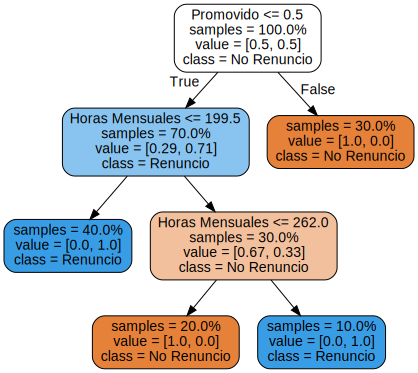

In [256]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(dtree.tree_,'HRTree.dot',feature_names = list(dtreeX.drop("Renuncio",axis=1).columns),
                class_names = ['No Renuncio','Renuncio'],proportion = True,
                impurity = False,rounded = True,filled=True)

with open("HRTree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# Aplicación 2: Sobrevivientes del Titanic. 

### Estas haciendo un estudio de los pasajeros del Titanic, y quieres ver que factores hacian  que un pasajero no fuera rescatado. Tienes varios datos sobre los pasajeros y si sobrevivieron o no. Decides elaborar un arbol de decisión para este problema.

![title](http://thespiritscience.net/wp-content/uploads/2016/06/Titanic-sinking.jpg)
<a id="titanic"></a>

### Primero, como siempre, le echamos un vistazo a los datos.

In [257]:
titanic = pd.read_csv('titanic_esp.csv')
titanic.head(10)

,Clase,Sexo,Edad,Hermanos/Parejas,Padres/hijos,Costo,Puerto,Sobrevivio
0,3,male,22,1,0,7.2500,S,0
1,1,female,38,1,0,71.2833,C,1
2,3,female,26,0,0,7.9250,S,1
3,1,female,35,1,0,53.1000,S,1
4,3,male,35,0,0,8.0500,S,0
5,3,male,28,0,0,8.4583,Q,0
6,1,male,54,0,0,51.8625,S,0
7,3,male,2,3,1,21.0750,S,0
8,3,female,27,0,2,11.1333,S,1
9,2,female,14,1,0,30.0708,C,1


### Procedemos a crear el arbol.

In [258]:
titanic_root = Crear_Arbol(titanic,target = "Sobrevivio",max_depth=3)
Imprimir_Arbol(titanic_root)

 0 :  Sexo = male
  1 :   Puerto = Q
   2 :    Clase = 1
    3 :     0
    3 :     0
   2 :    Hermanos/Parejas <= 1.0
    3 :     0
    3 :     0
  1 :   Costo <= 71.11332
   2 :    Clase = 1
    3 :     1
    3 :     1
   2 :    Clase = 1
    3 :     1
    3 :     1


### Vamos ahora a crear un metodo para recorrer el arbol, y crear predicciones basadas en el arbol creado.

In [259]:
def Parse_Value(value):
    #Metodo para convertir los string  en valores.
    if "." in value:
        return float(value)
    try:
        return int(value)
    except:
        return value

def Predict(Node,row):
    #Recorre el arbol hasta llegar a una predicción, traversando el arbol de decisión.
    if isinstance(Node,dict):
        condition = Node['condition'].split()
        column = condition[0]
        comparison = condition[1]
        value = Parse_Value(condition[2])
        
        if comparison == "=":
            if row[column] == value:
                return Predict(Node['left'],row)
            else:
                return Predict(Node['right'],row)
        else:
            if row[column] <= value:
                return Predict(Node['left'],row)
            else:
                return Predict(Node['right'],row)
        
    else:
        return Node
    
def Test(sample,tree,target, verbose = True):
    #Metodo para evaluar el arbol.
    total = 0
    for index,row in sample.iterrows():
        real = row[target]
        prediction = Predict(tree,row)
        if verbose:
            print("Esperado: " + str(real) + " Predicción: " + str(prediction))
        total += real == prediction
    accuracy = total/len(sample)
    if verbose:
        print("Accuracy = {}%".format(round(accuracy*100,2)))
    return accuracy

### ¿Cómo cambia el arbol  según cambiamos la profundidad maxima?

In [260]:
Xtrain,Xtest,ytrain,ytest = train_test_split(titanic.drop('Sobrevivio',axis = 1),titanic['Sobrevivio'],
                                             test_size = 0.4,random_state = 777)
Xtrain['Sobrevivio'] =  ytrain
train_root = Crear_Arbol(Xtrain,target = "Sobrevivio",max_depth=3)
Imprimir_Arbol(train_root)

 0 :  Sexo = female
  1 :   Costo <= 70.13
   2 :    Clase = 1
    3 :     1
    3 :     1
   2 :    Clase = 1
    3 :     1
    3 :     1
  1 :   Costo <= 7.775
   2 :    Padres/hijos = 0
    3 :     0
    3 :     0
   2 :    Puerto = Q
    3 :     0
    3 :     0


In [261]:
Xtest['Sobrevivio'] = ytest
Test(Xtrain,train_root,'Sobrevivio',verbose = False)
Test(Xtest,train_root,'Sobrevivio',verbose = False)

0.7675070028011205

### Lo comparamos con aquel creado por la libreria.

In [262]:
titanic_lib = pd.read_csv('titanic_friendly.csv')
titanic_tree = DecisionTreeClassifier(max_depth = 3)
Xtrain,Xtest,ytrain,ytest = train_test_split(titanic_lib.drop('Sobrevivio',axis = 1),titanic_lib['Sobrevivio'],
                                             test_size = 0.4,random_state = 777)
titanic_tree.fit(Xtrain,ytrain)
titanic_tree.score(Xtest,ytest)

0.79831932773109249

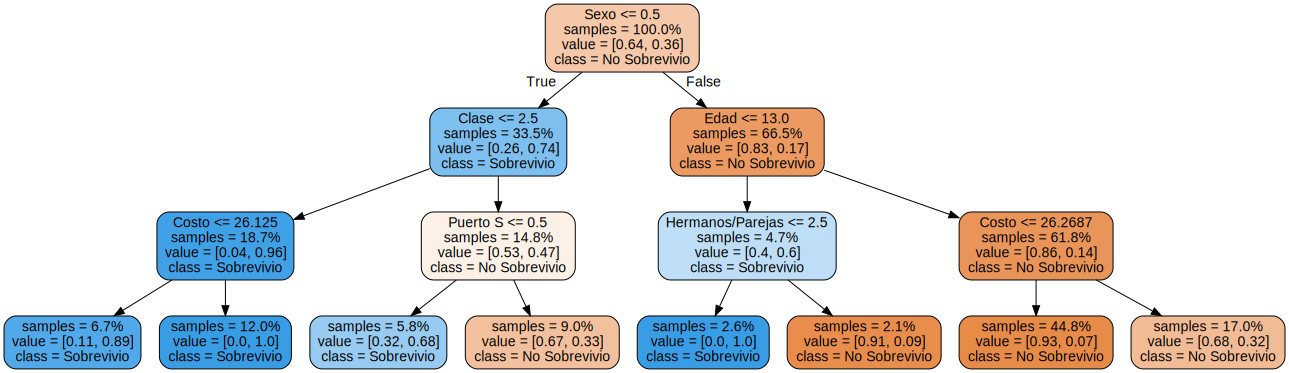

In [263]:
export_graphviz(titanic_tree.tree_,'TitanicTree.dot',feature_names = list(titanic_lib.drop("Sobrevivio",axis=1).columns),
                class_names = ['No Sobrevivio','Sobrevivio'],proportion = True,
                impurity = False,rounded = True,filled=True)

with open("TitanicTree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## Regresión con Arbol de Decisión

![title](https://boraberan.files.wordpress.com/2014/02/regressiontreeinr.png?w=660&h=269)

### Los arboles de decisión también pueden ser utilizados para crear predicciones de valores continuos. Las unicas diferencias son como conseguimos la mejor división y como hacemos las predicciones. En el caso del gini, buscamos la división que hacia la proporción de valores cambiara drasticamente. Pero, como tenemos valores continuos, la proporción de valores seria más dificil de usar. ¿ Qué alternativa tenemos?

### Metodo de  reducción de la desviación estandar (SDR)

#### La desviación  estandar es un valor que representa que tanto los valores de un grupo se diferencian del promedio del grupo. Si la distancia entre los valores del grupo es grande, la desviación estandar también es grande. En si, este valor representa que tan cerca estan los valores de un grupo del promedio.

#### Para encontrar la mejor división en caso de valores continuos, queremos una división que contenga un subgrupo cuyos valores sean muy diferentes a los del grupo original sin dividir. Esto nos dice que encontramos una división donde los valores son tan diferentes, que serían una buena separación o condición de los datos para la predicción final. Ejemplo: 

In [264]:
samp= titanic.sample(10,random_state=42)
samp

,Clase,Sexo,Edad,Hermanos/Parejas,Padres/hijos,Costo,Puerto,Sobrevivio
709,3,male,30,1,1,15.2458,C,1
439,2,male,31,0,0,10.5000,S,0
840,3,male,20,0,0,7.9250,S,0
720,2,female,6,0,1,33.0000,S,1
39,3,female,14,1,0,11.2417,C,1
290,1,female,26,0,0,78.8500,S,1
300,3,female,28,0,0,7.7500,Q,1
333,3,male,16,2,0,18.0000,S,0
208,3,female,16,0,0,7.7500,Q,1
136,1,female,19,0,2,26.2833,S,1


### Si comparamos la desviación estandar de la variable de interés antes y despues de separarla, podemos notar una diferencia.

In [265]:
print("Desviación Estandar Original: {}".format(samp.Costo.std()))
print("Desviación Estandar Puerto C: {}".format(samp.loc[samp.Puerto == 'C'].Costo.std()))
print("Desviación Estandar Puerto S: {}".format(samp.loc[samp.Puerto == 'S'].Costo.std()))
print("Desviación Estandar Puerto Q: {}".format(samp.loc[samp.Puerto == 'Q'].Costo.std()))

Desviación Estandar Original: 21.817212548953687
Desviación Estandar Puerto C: 2.8313262625490547
Desviación Estandar Puerto S: 26.137163710223035
Desviación Estandar Puerto Q: 0.0


In [266]:
orig  = samp.Costo.std()
print("Diferencia Desviación Estandar Puerto C: {}".format(orig - samp.loc[samp.Puerto == 'C'].Costo.std()))
print("Diferencia Desviación Estandar Puerto S: {}".format(orig - samp.loc[samp.Puerto == 'S'].Costo.std()))
print("Diferencia Desviación Estandar Puerto Q: {}".format(orig - samp.loc[samp.Puerto == 'Q'].Costo.std()))

Diferencia Desviación Estandar Puerto C: 18.985886286404632
Diferencia Desviación Estandar Puerto S: -4.319951161269348
Diferencia Desviación Estandar Puerto Q: 21.817212548953687


### De esta forma, llegamos al metodo de la reducción de la desviación estandar.  Decidimos que la mejor división es aquella en la cual la diferencia entre la desviación estandar total y la desviación estandar del grupo luego de dividir sea mayor.

#### $$ SDR(y,x) = SD(y) - SD(y,x) $$

### Esto nos dice, que la mejor división es aquella que es más homogenea, o diferente a la original.

<a id="reg"></a>

In [267]:
def SdevReduction(groups,sdev,target_name):
    best_sdev = 0
    best_group = None
    for group in groups:
        groupsdev = group[target_name].std()
        diff = sdev - groupsdev
        if diff > best_sdev:
            best_sdev = diff
            best_group = group
            
    return best_sdev

In [268]:
def Get_Best_Column_Reg(data,target,verbose = False):
    temp = data.drop(target, axis = 1).copy()
    best_sdev = 0
    best_split_condition = ""
    best_split = {}
    orig_sdev = data[target].std()
    for column in temp.columns:
        column_splits = Create_Split(data,column)
        for split in column_splits:
            split_sdev = SdevReduction(split[0:2],orig_sdev,target)
            if verbose:
                print("Splitting : " + split[2] + " SDEV : " + str(split_sdev))
            if split_sdev > best_sdev:
                best_sdev = split_sdev
                best_split_condition = split[2]
                best_split["left"] = split[0].drop(column,axis = 1)
                best_split["right"] = split[1].drop(column, axis = 1)
                best_split["condition"] = best_split_condition
                
    if verbose:
        print("Best split: " + best_split_condition + " best SDEV: " + str(best_sdev))
    return best_split

## Para las predicciones, en vez de escoger el valor más común de la división, escogemos el valor que mejor representa la división: la media.

In [269]:
def terminal_reg(group,target):
    return group[target].mean()

In [270]:
def Reg_Split(split,cur_depth,min_size,target,max_depth=3,verbose = False):
    left,right = split["left"],split["right"]
    #In case our depth is too large.
    del split["left"]
    del split["right"]
    
    
    if  len(left) == 0 or  len(right) == 0:
        split["left"] = split["right"] = terminal_reg(left.append(right),target)
        return
    if cur_depth == max_depth:
        split["left"], split["right"] = terminal_reg(left,target), terminal_reg(right,target)
        return
    #Calculate left
    if len(left) <= min_size:
        split["left"] = terminal_reg(left,target)
    else:
        split["left"] = Get_Best_Column_Reg(left,target,verbose = verbose)
        Reg_Split(split["left"],cur_depth + 1,min_size,target,max_depth,verbose = verbose)
    
    #Calculate right
    if len(right) <= min_size:
        split["right"] = terminal_reg(right,target)
    else:
        split["right"] = Get_Best_Column_Reg(right,target,verbose = verbose)
        Reg_Split(split["right"],cur_depth + 1,min_size,target,max_depth,verbose= verbose)

In [271]:
def Build_Reg_Tree(data,target,min_size= 2,max_depth= 3,verbose = False):
    root = Get_Best_Column_Reg(data,target, verbose = verbose)
    Reg_Split(root,1,min_size,target,max_depth,verbose = verbose)
    return root

## Al final, la construcción del arbol es la misma, solo difieren los metodos mencionados anteriormente.

In [272]:
costo_tree = Build_Reg_Tree(samp,'Costo',max_depth = 3)
Imprimir_Arbol(costo_tree)

 0 :  Puerto = Q
  1 :   7.75
  1 :   Hermanos/Parejas = 1
   2 :    13.243749999999999
   2 :    Padres/hijos = 0
    3 :     28.818749999999998
    3 :     29.64165


### De nuevo, veamoslo más claro con un arbol creado por una libreria.

In [273]:
from sklearn.tree import DecisionTreeRegressor

dtreereg = DecisionTreeRegressor(max_depth=3)
dtreeregX = samp.copy()
dtreeregX.Puerto = LabelEncoder().fit_transform(dtreeregX.Puerto)
dtreeregX.Sexo = LabelEncoder().fit_transform(dtreeregX.Sexo)
dtreereg.fit(dtreeregX.drop("Costo",axis = 1),dtreeregX.Costo)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

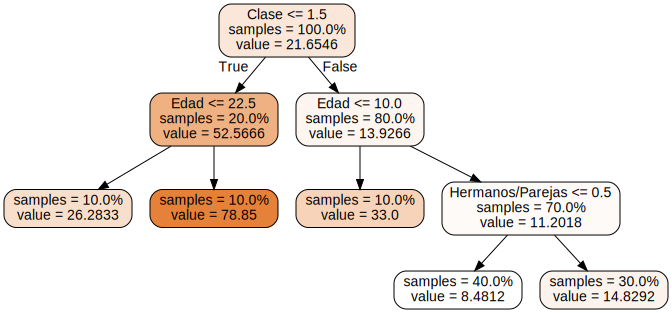

In [274]:
export_graphviz(dtreereg.tree_,'RegTree.dot',feature_names = list(dtreeregX.drop("Costo",axis=1).columns)
                ,proportion = True,impurity = False,rounded = True,filled=True)

with open("RegTree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## Aplicación 3 : Millas por Galón de un Vehículo

#### Estas investigando que vehículo comprar con un prestamo de vehículo que conseguiste. No te interesa mucho el costo, pero si cuantas millas por galón de gasolina puede recorrer. Tienes información de algunos vehículos, pero quieres saber cuanto puede recorrer solo con la información del vehículo. Creas un arbol de regresión con este proposito.

![title](https://article.images.consumerreports.org/w_767,ar_32:11,c_lfill/prod/content/dam/cro/news_articles/cars/CR-BG-Sports-Car-Hero-08-16)
<a id="mpg"></a>

#### Visualicemos los datos.

In [275]:
cars = pd.read_csv('carros.csv')
cars.head(10)

,mpg,cilindros,disp,CDF,Peso,Aceleracion
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5
2,18.0,8,318.0,150,3436,11.0
3,16.0,8,304.0,150,3433,12.0
4,17.0,8,302.0,140,3449,10.5
5,15.0,8,429.0,198,4341,10.0
6,14.0,8,454.0,220,4354,9.0
7,14.0,8,440.0,215,4312,8.5
8,14.0,8,455.0,225,4425,10.0
9,15.0,8,390.0,190,3850,8.5


### Creamos el arbol y lo evaluamos con el error cuadrado promedio.

In [276]:
Xtrain,Xtest,ytrain,ytest = train_test_split(cars.drop('mpg',axis = 1),cars['mpg'],
                                             test_size = 0.4,random_state = 777)
Xtrain['mpg'] = ytrain
carros_tree = Build_Reg_Tree(Xtrain,'mpg',max_depth = 4)
Imprimir_Arbol(carros_tree)

 0 :  disp <= 304.0
  1 :   cilindros <= 6.0
   2 :    CDF <= 100.0
    3 :     Peso <= 2045.0
     4 :      32.675000000000004
     4 :      26.800833333333333
    3 :     Peso <= 3490.0
     4 :      21.900000000000002
     4 :      17.099999999999998
   2 :    Aceleracion <= 11.5
    3 :     CDF = 139
     4 :      18.1
     4 :      17.0
    3 :     Peso <= 3810.0
     4 :      20.03333333333333
     4 :      12.9
  1 :   Peso <= 4665.8
   2 :    Aceleracion <= 13.5
    3 :     CDF <= 150.8
     4 :      15.76923076923077
     4 :      13.578947368421053
    3 :     CDF <= 147.4
     4 :      16.25
     4 :      16.3
   2 :    CDF <= 177.0
    3 :     Aceleracion <= 12.0
     4 :      14.0
     4 :      12.0
    3 :     Aceleracion = 11.5
     4 :      12.0
     4 :      12.5


In [277]:
def Reg_Test(sample,tree,target, verbose = True):
    error = 0
    for index,row in sample.iterrows():
        real = row[target]
        prediction = Predict(tree,row)
        if verbose:
            print("Expected: " + str(real) + " Predicted: " + str(prediction))
        error += (real - prediction) ** 2
    MSE  = error/len(sample)
    print("MSE final: {}".format(MSE))
    return MSE

In [278]:
Xtest['mpg'] = ytest
Reg_Test(Xtest,carros_tree,'mpg',verbose = False)

MSE final: 22.20077004834157


22.200770048341571

### Vamos a compararlo con un arbol de sklearn y visualizarlo por ahi mismo.

In [279]:
carroreg = DecisionTreeRegressor(max_depth=2)
carroreg.fit(Xtrain.drop('mpg',axis = 1),Xtrain['mpg'])
print("MSE del modelo {}".format(mean_squared_error(ytest,carroreg.predict(Xtest.drop('mpg',axis = 1)))))

MSE del modelo 18.385944800450478


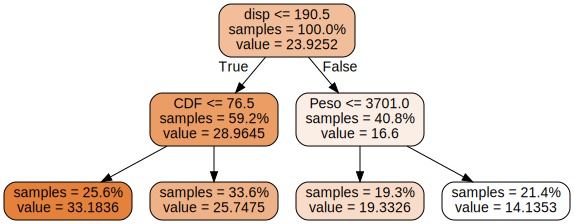

In [280]:
export_graphviz(carroreg.tree_,'CarroTree.dot',feature_names = list(Xtrain.drop("mpg",axis=1).columns)
                ,proportion = True,impurity = False,rounded = True,filled=True)

with open("CarroTree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## Validación en cruz

### Hasta ahora, hemos estado validando nuestro modelo separando los datos entre datos de entrenamiento y datos de prueba. Pero que pasa si tenemos suerte (o en realidad, mala suerte) y los datos de prueba que utilizamos para validar son exactamente como los de entrenamiento y nuestro modelo en realidad no generalizó bien? 


### Para evitar esto, empleamos *validación en cruz*. Dividimos los datos en entrenamiento y prueba y validamos el modelo.  Luego, agremos los datos que utilizamos para probar el modelo a los datos de entrenamiento, y  utilizamos como datos de prueba, datos diferentes a los utilizados para validar la vez anterior. Y así sucesivamente, hasta validar con todos los datos. 

![title](http://www.thefactmachine.com/wp-content/uploads/2015/03/13-Kfold-CrossValidation.gif)

### Si promediamos el rendimiento en cada validación, sabremos si el modelo en verdad pudo generalizar bien.  Esto tambien nos ayuda a saber si escogimos bien los parametros del modelo, el cual nos lleva a...

## Optimización de parametros del modelo

### En regresión lineal y logistica, solo teniamos que buscar el mejor valor para el ritmo de aprendizaje, el cual podiamos buscar hasta de manera manual. Pero, hemos visto en los modelos de regularización y en los arboles de decisión, que algunos modelos pueden tener varios parametros. Esto hace que buscar los parametros manualmente sea demasiado tedioso. 

### Utilizando validación en cruz, y diferentes combinaciones de los parametros del modelo, podemos encontrar la combinación que generalice mejor. Hay dos maneras comunes de buscar estos parametros:

### Busqueda  Exhaustiva

#### En la busqueda exhaustiva, definimos en una lista los posibles valores de cada parametro. Ejemplo:

#### $$ max \ depth = [1,2,3,4,5] $$
#### $$ min \ size = [2,10,20,30] $$

#### Probamos todas las combinaciones posibles de max_depth y min_size hasta obtener la combinación que nos da el mejor error de validación. Este procedimiento esta casi seguro de encontrar la mejor combinación de parametros, con la desventaja de que es lento, ya que tiene que entrenar un modelo para cada combinación.

### Busqueda Aleatoria 

#### En la busqueda aleatoria, definimos un rango de los posibles valores de cada parametro. Ejemplo: 

#### $$ max \ depth = [1,8] $$
#### $$ min \ size = [1,100] $$ 

#### Probamos varias combinaciones de max_depth y min_size hasta y nos quedamos con la combinación que nos da el mejor error de validación. Este procedimiento es tan rápido como deseamos, pero nos podemos perder del mejor parametro posible, ya que probamos aleatoriamente.

## Aplicación 4 Optimizar Arbol Titanic

### Basandonos en el arbol creado anteriormente, creemos un arbol que minimice el error de validación para los datos del Titanic vistos anteriormente.

![title](https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png)
<a id="opt"></a>

### Primero, vamos a definir la validación en cruz. 

In [281]:
def Validacion_Cruz(datos,target,min_size,max_depth,tamaño = 5,verbose = False):
    datos = datos.sample(frac = 1.) # Mezclar los datos
    test_size = len(datos) // tamaño
    errores = []
    full_size = len(datos)
    for i in range(tamaño):
        if verbose:
            print("Creando folde {}".format(i+1))
        test =  titanic.iloc[i * test_size :(i + 1) * test_size] #Conseguir datos de prueba
        train_mask = np.logical_not(titanic.index.isin(test.index)) #Conseguir los datos que no estan en prueba
        train = titanic.loc[train_mask] #Setear datos de entrenamiento
        
        train_root = Crear_Arbol(train,target = target,min_size = min_size, max_depth= max_depth)
        error = Test(test,train_root,target,verbose = False)
        if verbose:
            print("Certeza en el folde {}: {}".format(i+1,error))
        errores.append(error)
    promedio = np.array(errores).mean()
    print("Error CV: {}".format(promedio))
    
    return promedio

Validacion_Cruz(titanic,"Sobrevivio",min_size = 2,max_depth = 3,verbose = True)

Creando folde 1
Certeza en el folde 1: 0.8146067415730337
Creando folde 2
Certeza en el folde 2: 0.797752808988764
Creando folde 3
Certeza en el folde 3: 0.7865168539325843
Creando folde 4
Certeza en el folde 4: 0.7359550561797753
Creando folde 5
Certeza en el folde 5: 0.797752808988764
Error CV: 0.7865168539325842


0.78651685393258419

### Ahora, creamos ambas formas de optimizar los paremetros.  Para el exhaustivo, definimos todos los valores posibles.

In [282]:
def Busqueda_Exhaustiva(datos,target,profundidades,sizes,tamaño = 5,verbose = False):
    best_accuracy = 0
    best_depth = 0
    best_size = 0
    #Probar todas las combinaciones
    for d in profundidades:
        for size in sizes:
            print("Probando para profundidad {} y min size {}".format(d,size))
            rendimiento = Validacion_Cruz(datos,target,size,d,tamaño,verbose)
            if rendimiento > best_accuracy:
                best_accuracy = rendimiento
                best_depth = d
                best_size = size
    
    print("Mejor combinación fue profunidad {} y min size {}. Accuracy: {}".format(best_depth,best_size,round(best_accuracy,4)))
    return [best_depth,best_size]
    
profundidades = [1,3,5]
sizes = [2,len(titanic)//6,len(titanic)//4]
Busqueda_Exhaustiva(titanic,'Sobrevivio',profundidades,sizes)

Probando para profundidad 1 y min size 2
Error CV: 0.7865168539325842
Probando para profundidad 1 y min size 148
Error CV: 0.7865168539325842
Probando para profundidad 1 y min size 222
Error CV: 0.7865168539325842
Probando para profundidad 3 y min size 2
Error CV: 0.7865168539325842
Probando para profundidad 3 y min size 148
Error CV: 0.7865168539325842
Probando para profundidad 3 y min size 222
Error CV: 0.7865168539325842
Probando para profundidad 5 y min size 2
Error CV: 0.7898876404494382
Probando para profundidad 5 y min size 148
Error CV: 0.7865168539325843
Probando para profundidad 5 y min size 222
Error CV: 0.7865168539325842
Mejor combinación fue profunidad 5 y min size 2. Accuracy: 0.7899


[5, 2]

#### Para la busqueda aleatoria, definimos los rangos de los cuales queremos sacar los valores de los parametros, y establecemos un numero de intentos de la busqueda.

In [283]:
def Busqueda_Aleatoria(datos,target,profundidad_range,sizes_range,tamaño = 3,intentos = 7,verbose = False):
    best_accuracy = 0
    best_depth = 0
    best_size = 0
    #Probar combinaciones hasta agotar intentos.
    for i in range(intentos):
        d = np.random.randint(profundidad_range[0],profundidad_range[1])
        size = np.random.randint(sizes_range[0],sizes_range[1])
        print("Probando para profundidad {} y min size {}".format(d,size))
        rendimiento = Validacion_Cruz(datos,target,size,d,tamaño,verbose)
        if rendimiento > best_accuracy:
            best_accuracy = rendimiento
            best_depth = d
            best_size = size
    
    print("Mejor combinación fue profunidad {} y min size {}. Accuracy: {}".format(best_depth,best_size,round(best_accuracy,2)))
    return [best_depth,best_size]

profundidad_range = [1,(titanic.shape[1] - 1)]
sizes_range = [2,len(titanic)//4]
Busqueda_Aleatoria(titanic,'Sobrevivio',profundidad_range,sizes_range)

Probando para profundidad 4 y min size 181
Error CV: 0.7867564534231201
Probando para profundidad 6 y min size 71
Error CV: 0.7789001122334455
Probando para profundidad 6 y min size 208
Error CV: 0.7867564534231201
Probando para profundidad 3 y min size 24
Error CV: 0.7867564534231201
Probando para profundidad 4 y min size 99
Error CV: 0.7777777777777778
Probando para profundidad 3 y min size 80
Error CV: 0.7867564534231201
Probando para profundidad 1 y min size 123
Error CV: 0.7867564534231201
Mejor combinación fue profunidad 4 y min size 181. Accuracy: 0.79


[4, 181]

### Para cerrar, estas no son las unicas formas de obtener los mejores "splits" o divisiones en un arbol. Tambien existen:

#### Information Gain: 
![title](https://wikimedia.org/api/rest_v1/media/math/render/svg/70b8bc9f2666c42790b5aa20b13a55bdc503dbb7)
![title](https://wikimedia.org/api/rest_v1/media/math/render/svg/ce0dd99cf3953982028c7a568dafaaf0c82bc0a9)

#### Minimización SSE:

$$ SSE = \sum(y_i - \bar{y_1})^2 + \sum(y_i - \bar{y_2})^2$$

#### Minimización MAE: 

$$ MAE = \sum|y_i - \bar{y_1}| + \sum|y_i - \bar{y_2}|$$

#### Entre otros...

# Preguntas?